<a href="https://colab.research.google.com/github/LucasMatuszewski/Python-colab-notebooks/blob/main/notebooks/google_startup_school_week_1_Luis_Sala_Google_Vertex_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to [Goo.gle/LuisLab](https://goo.gle/LuisLab)

# 1.0 - Introduction

This Colab notebook guides developers through various exercises intended to educate the reader on how to begin building Generative AI applications powered by Google Gemini and Vertex AI on Google Cloud.

Exercises include:

1.   Setup
2.   Using the Google Gen AI SDK: Text Prompts & Image Generation
3.   Alternate APIs via OpenAI Compatibility or LiteLLM
4.   Structured Output
5.   Function Calling
6.   Grounding with Google Search
7.   Processing Web Pages
8.   Build an Agent with Gemini & CrewAI



# 2.0 - Initial Setup

## Pre-requisites

### 1. Create a Google Cloud account and (optional) organization:
* https://cloud.google.com/free
* https://cloud.google.com/docs/get-started

### 2. Create a GCP Project
* https://console.cloud.google.com/projectcreate
* Take note of the new project's ID.

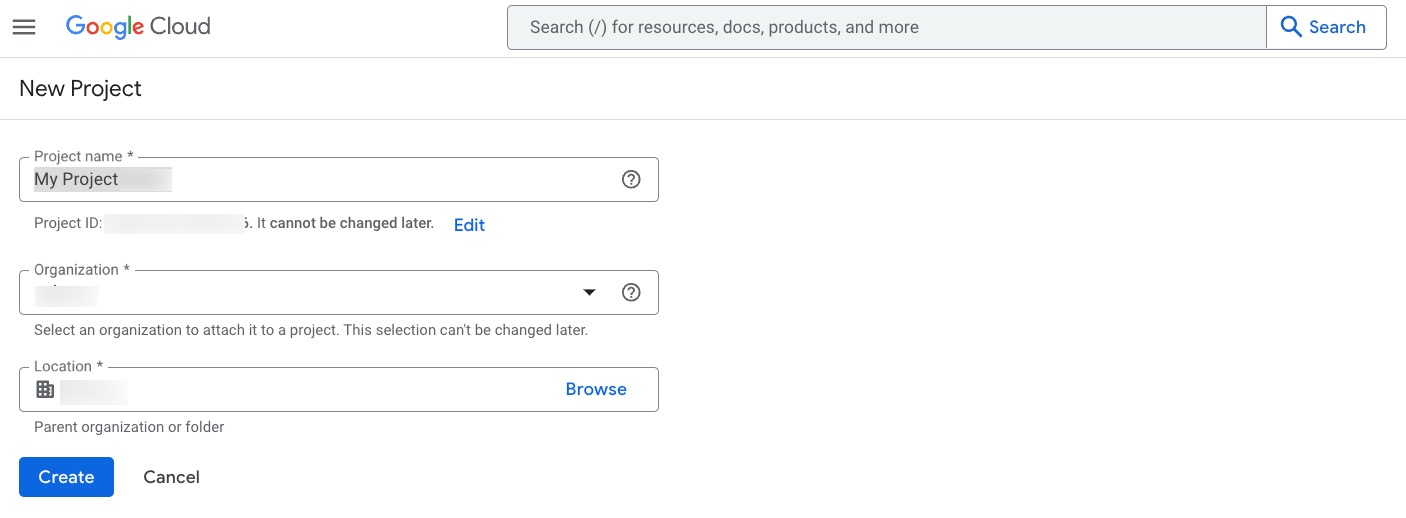

### 3. Select the Project and Search for Vertex AI
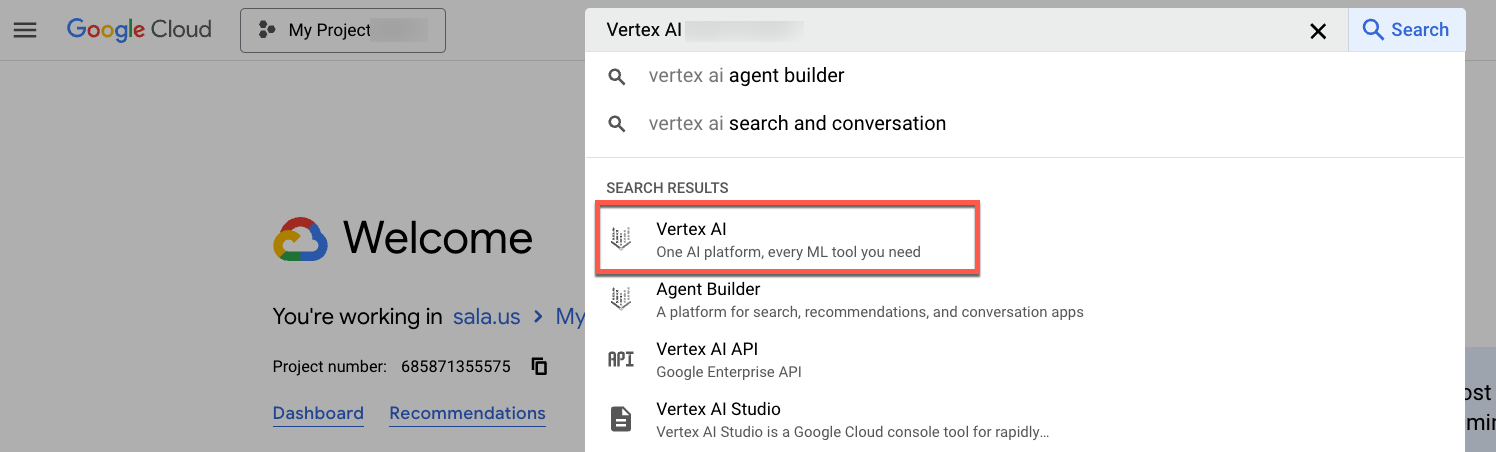

### 4. Enable Recommended APIs
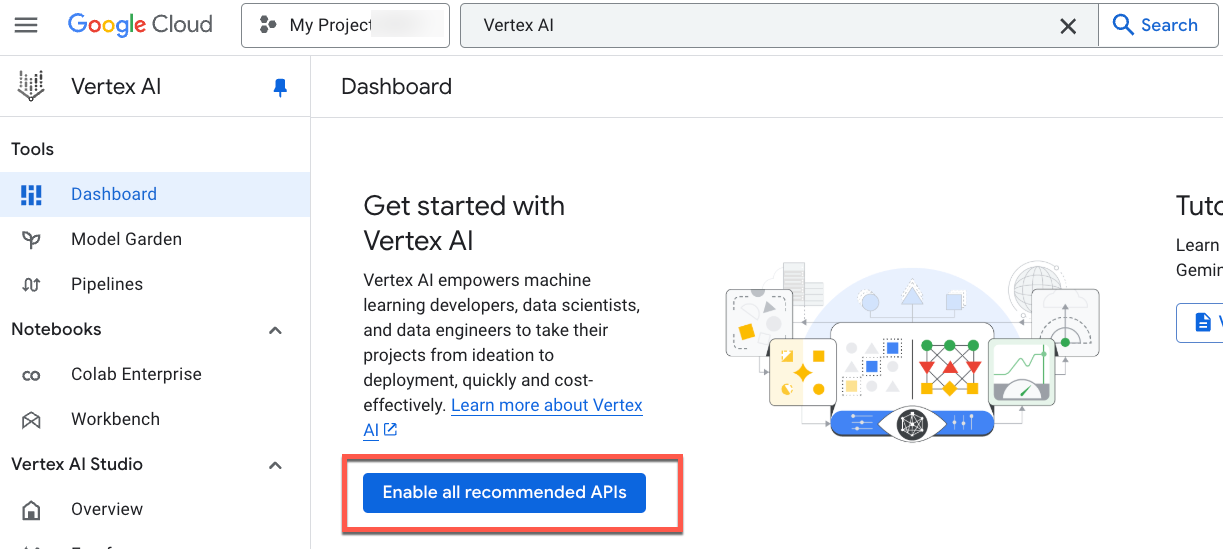

### 5. Test Vertex AI Studio
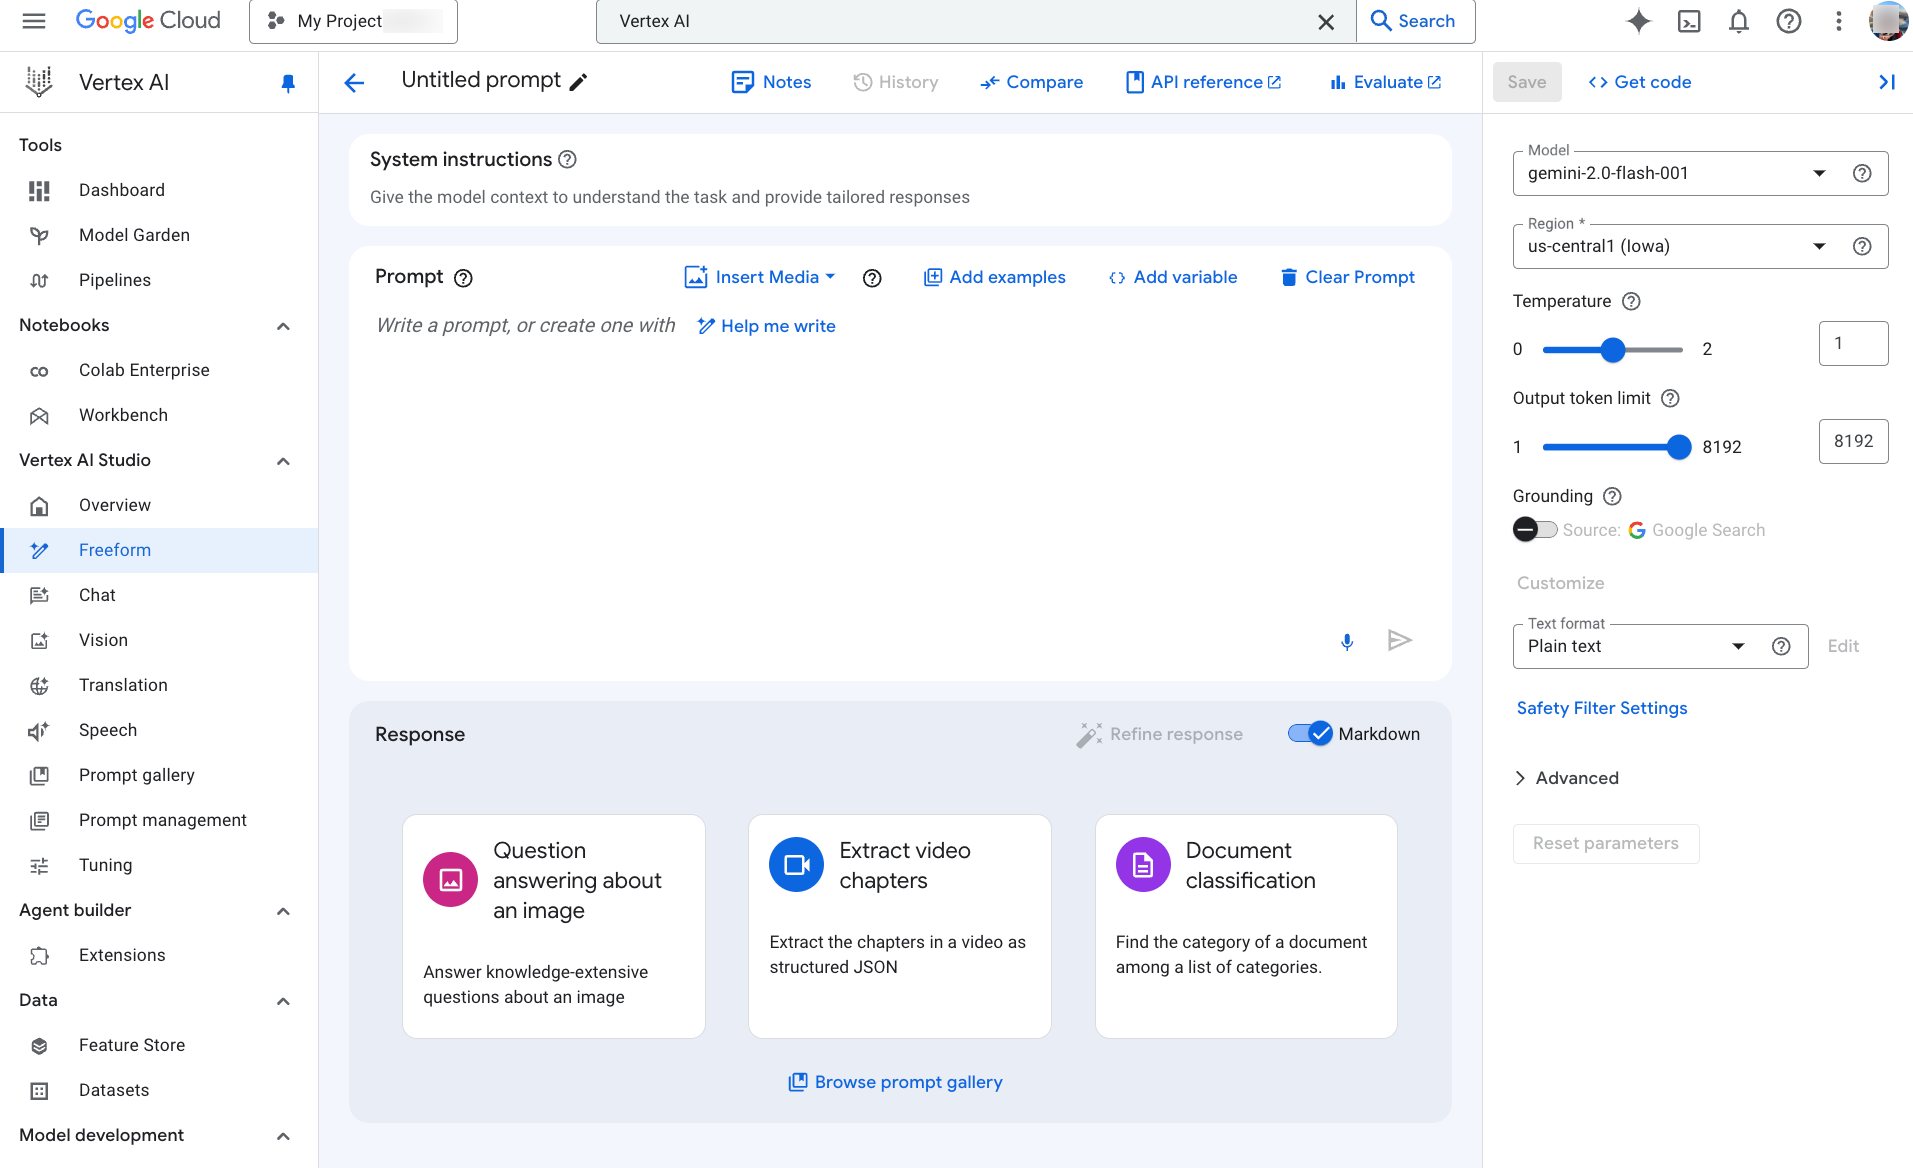

## Install Dependencies

In [ ]:
!pip install -U -q google-genai
!pip install -U -q google-cloud-storage
!pip install -U -q playwright
!pip install -U -q requests
!pip install -U -q openai
!pip install -U -q google-auth
!playwright install --with-deps chromium
!pip install -U -q crewai-tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 MB 17.4 MB/s eta 0:00:00
Installing dependencies...
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/c

## Restart the Colab Session

To use the newly installed packages in this Colab runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

Technically optional since Colab should prompt to restart the session after installing the dependencies above.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

## Authenticate with Google Cloud (Colab Only)
Google Colab projects can authenticate against Google Cloud via the following calls. It is not required if running on Colab Enterprise or Vertex AI Workbench.

Running the cell below sets up the "[Application Default Credentials](https://cloud.google.com/docs/authentication/provide-credentials-adc)." which are used by our SDKs to automatically authenticate against Google Cloud Services.

In short, this is equivalent to the following gcloud CLI commands:
```bash
$ gcloud auth login
$ gcloud auth application-default login
```

An authentication pop-up will appear, please accept the permissions before proceeding.

### Alternative: Using Gemini API Keys
Some of these code samples will only work with a Google Cloud account, but the basic Gemini SDK will also work via an API key that can be obtained from [Google AI Studio](https://aistudio.google.com).

**Steps:**
1. Get an API key from: https://aistudio.google.com/app/apikey
2. Create a Colab "secret" called `AI_STUDIO_API_KEY` in the "Secrets" tab on the left hand side of Colab.
3. Make sure that `PROJECT_ID` *is not* defined. This ensures that AI Studio's API key will be used instead.

In [ ]:
from google.colab import userdata
from google.colab import auth
import sys

# Leave PROJECT_ID Blank to use an API Key instead
PROJECT_ID = "cloud-llm-preview1" # @param {type: "string"}
LOCATION = "us-central1" # @param {type: "string"}
BUCKET = "" # @param{type:"string"}



if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user(project_id=PROJECT_ID)

## Enable Google Cloud Services

In [ ]:
# !gcloud services enable \
# cloudresourcemanager.googleapis.com \
# aiplatform.googleapis.com \
# documentai.googleapis.com \
# notebooks.googleapis.com \
# visionai.googleapis.com \
# storage-component.googleapis.com \
# cloudaicompanion.googleapis.com \
# discoveryengine.googleapis.com \
# --project {PROJECT_ID}

# 3.0 - Using the Google Gen AI SDK

- **SDK Documentation:** https://googleapis.github.io/python-genai
- **Github Source Code:** https://github.com/googleapis/python-genai

## Model Options
This code sample includes Gemini 2.0, 1.5, and Meta Llama 3


## Quick Example


### Initialize the Client Library
We initialize the client by first determining whether or not to use Vertex AI by checking if "PROJECT_ID" is empty.

In [ ]:
from google import genai
from google.genai import types
from IPython.display import Markdown

# Initialize the client by first determining whether or not to use Vertex AI
# by checking if "PROJECT_ID" is empty.
if PROJECT_ID == "":
  GOOGLE_API_KEY=userdata.get('AI_STUDIO_API_KEY')
  client = genai.Client(api_key=GOOGLE_API_KEY)
else:
  client = genai.Client(project=PROJECT_ID, location="us-central1", vertexai=True)

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:502: UserWarning: <built-in function any> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


### Call Gemini 2.0 Flash

In [ ]:
response = client.models.generate_content(
    model="gemini-2.0-flash-001",
    contents="What's the largest planet in our solar system? Tell me 3 facts about it."
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

Here are three facts about it:

1.  **Great Red Spot:** Jupiter is famous for its Great Red Spot, a persistent anticyclonic storm larger than Earth that has been raging for at least 350 years.
2.  **Fastest Rotation:** Jupiter has the shortest day of all the planets in our solar system. It completes one rotation in just under 10 hours.
3.  **Ring System:** Like Saturn, Jupiter has rings, but they are much fainter and composed mostly of dust particles.


## View the Response object

Note `usage_metadata` which includes token counts (useful when estimating costs)


In [ ]:
print(response.model_dump_json(indent=2))

{
  "candidates": [
    {
      "content": {
        "parts": [
          {
            "video_metadata": null,
            "thought": null,
            "code_execution_result": null,
            "executable_code": null,
            "file_data": null,
            "function_call": null,
            "function_response": null,
            "inline_data": null,
            "text": "The largest planet in our solar system is **Jupiter**.\n\nHere are three facts about it:\n\n1.  **Great Red Spot:** Jupiter is famous for its Great Red Spot, a persistent anticyclonic storm larger than Earth that has been raging for at least 350 years.\n2.  **Fastest Rotation:** Jupiter has the shortest day of all the planets in our solar system. It completes one rotation in just under 10 hours.\n3.  **Ring System:** Like Saturn, Jupiter has rings, but they are much fainter and composed mostly of dust particles.\n"
          }
        ],
        "role": "model"
      },
      "citation_metadata": null,
      "fin

### Chat with a Model (Bonus: Streaming Content)
The previous examples use `client.models.generate_content()` but one can use `client.chats.create()` to create a chat that inherently remembers past conversations, effectively giving the model a "memory" as "big" as the context window.

This example also demonstrates streaming by printing out the chunks as they arrive.

**Learn more at:** https://googleapis.github.io/python-genai/#chats

In [ ]:
chat = client.chats.create(model='gemini-2.0-flash-001')
for chunk in chat.send_message_stream("Tell me 3 facts about Jupiter and its moons"):
    print(chunk.text, end="")

Okay, here are 3 facts about Jupiter and its moons:

1.  **Jupiter has the most moons in our solar system.** As of today, Jupiter has 95 confirmed moons. This number is likely to increase as technology improves and we are able to discover smaller moons in Jupiter's orbit.

2.  **Io, one of Jupiter's Galilean moons, is the most volcanically active world in the Solar System.**  Its volcanic activity is caused by the tidal forces exerted by Jupiter and the other Galilean moons, which constantly flex and heat Io's interior.

3.  **Europa, another Galilean moon, is believed to have a liquid water ocean beneath its icy surface.** This makes it a prime target in the search for extraterrestrial life, as liquid water is considered essential for life as we know it.


#### Chat "Memory" Test

Here we use the same `chat` instance to continue the conversation, which demonstrates that the message history is stored by the chat instance.

In this case, the model should return additional information about Jupiter.

In [ ]:
for chunk in chat.send_message_stream("Tell me more..."):
    print(chunk.text, end="")

Okay, you asked for it! Let's dive even *deeper* into the weeds, exploring some truly cutting-edge research and unresolved mysteries surrounding Jupiter and its moons. Be warned, this is where things get speculative and complex!

**1. The Search for Life on Europa and Enceladus: A Comparative Perspective**

*   **Why Europa?** Europa's subsurface ocean has long been considered a prime target in the search for life beyond Earth. The presence of liquid water, potential sources of energy (tidal heating and possible hydrothermal vents), and the possibility of organic molecules make it a potentially habitable environment.
*   **Enceladus's Challenge:** Saturn's moon Enceladus is another icy moon with a subsurface ocean, but unlike Europa, it's actively venting material into space through geysers at its south pole. These geysers contain water ice, organic molecules, and even evidence of hydrothermal activity. This makes Enceladus much easier to sample directly.
*   **The Debate:** The debate

### Let's try Llama!
The same function can access other hosted pay-as-you-go (PAYG) models!

**Note:** Llama 3.1 will need to be enabled via [Model Garden](https://console.cloud.google.com/vertex-ai/publishers/meta/model-garden/llama-3.1-405b-instruct-maas)

In [ ]:
response = client.models.generate_content(
    model="meta/llama-3.1-8b-instruct-maas",
    contents="What's the largest planet in our solar system? Tell me 3 facts about it."
)

Markdown(response.text)

The largest planet in our solar system is Jupiter. Here are three interesting facts about it:

1. **Massive Size**: Jupiter is the largest of all the planets in terms of both mass and size. It has a diameter of approximately 142,984 kilometers (88,846 miles), which is more than 11 times the diameter of the Earth.

2. **Atmospheric Composition**: Jupiter's atmosphere is primarily composed of hydrogen (about 75%) and helium (about 24%). It also contains smaller amounts of other gases, including methane, ammonia, and water vapor. The planet's atmosphere is known for its vibrant cloud bands, which are made up of different types of clouds and hazes.

3. **Moons and Magnetic Field**: Jupiter has a total of 92 confirmed moons, with four of them being particularly large: Io, Europa, Ganymede, and Callisto. These moons are known as the Galilean moons, as they were discovered by Galileo Galilei in 1610. Jupiter also has a very strong magnetic field, which is powered by its rapid rotation and convection in the planet's liquid metal hydrogen core. This magnetic field is so strong that it traps charged particles from the solar wind, creating a region around Jupiter known as the magnetosphere.

### System Instructions & Advanced Configuration
This example uses customized safety settings and generation configuration.

In [ ]:
from IPython.display import Markdown

# The default safety settings should be sufficient for most scenarios.
# Optionally, developers can customize the safety settings.
# Learn more at:
# - https://googleapis.github.io/python-genai/index.html#safety-settings
# - https://cloud.google.com/vertex-ai/generative-ai/docs/learn/responsible-ai
CUSTOM_SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH",
        threshold="BLOCK_ONLY_HIGH",
    ),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT",
        threshold="BLOCK_ONLY_HIGH",
    ),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

# Create a custom generation config to customize settings, such as temperature,
# response type, etc.
# - https://googleapis.github.io/python-genai/index.html#typed-config
MODEL_ID= 'gemini-2.0-flash-001' # @param ["gemini-2.0-flash-001", "gemini-2.0-flash-lite-preview-02-05", "gemini-2.0-pro-exp-02-05","gemini-2.0-flash-thinking-exp-01-21", "gemini-1.5-flash-002", "gemini-1.5-pro-002", "meta/llama-3.2-90b-vision-instruct-maas", "meta/llama-3.1-405b-instruct-maas","meta/llama-3.1-70b-instruct-maas","meta/llama-3.1-8b-instruct-maas"]
TEMPERATURE= 1 # @param {type:"slider", min:0, max:2, step:0.01}
TOP_P = 0.95 # @param {type:"slider", min:0, max:1, step:0.05}
TOP_K = 40 # @param {type:"slider", min:1, max:40, step:1}
MAX_OUTPUT_TOKENS = 8192 # @param {type:"slider", min:64, max:8192, step:64}
RESPONSE_TYPE = 'text/plain' # @param ["text/plain", "application/json'"]
SYSTEM_INSTRUCTION = "Speak like Shakespeare. Format your responses in markdown. Use lots of emoji." # @param {type:"string"}
PROMPT = "Tell me 3 facts about Jupiter." # @param {type:"string"}

CUSTOM_GENERATION_CONFIG = {
    "max_output_tokens": MAX_OUTPUT_TOKENS,
    "temperature": TEMPERATURE,
    "top_p": TOP_P,
    "top_k": TOP_K,
    "safety_settings": CUSTOM_SAFETY_SETTINGS,
    "responseMimeType": RESPONSE_TYPE,
    "system_instruction": SYSTEM_INSTRUCTION
}

response = client.models.generate_content(
    model=MODEL_ID,
    config=CUSTOM_GENERATION_CONFIG,
    contents=PROMPT
)

Markdown(response.text)

Hark, lend thine ear and I shall impart three celestial truths concerning Jove, the king of planets! 👑🪐

1.  **Great Red Spot:** A cyclopean storm doth rage upon its surface, a swirling tempest of crimson hue, larger than our very Earth! 🔴🌪️🌍
2.  **Many Moons:** Jupiter doth boast a retinue of moons, a grand company numbering more than fourscore, each a world of its own! 🌕🌕🌕(and more!)
3.  **Fast Rotation:** With astonishing speed, Jupiter doth spin upon its axis, completing a revolution in less than ten hours, a marvel of cosmic agility! ⏱️💨


---
---

# 4.0 - Alternate APIs & SDKS

Vertex-hosted models can be accessed via an OpenAI-compatible completions API, which means that any OpenAI-compatible SDK *should* work with Gemini and other Vertex Model Garden-hosted models.

## OpenAI-Compatible API
The [Gemini Chat Completions API](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/call-vertex-using-openai-library) is an OpenAI compatible API that uses OAuth to authenticate with a short-lived access token.

By default, access tokens last for 1 hour. You can extend the life of your access token or periodically refresh your token and update the OPENAI_API_KEY environment variable.

In [ ]:
from google.auth import default
import google.auth.transport.requests
import openai


# Programmatically get an access token
credentials, _ = default(scopes=["https://www.googleapis.com/auth/cloud-platform"])
credentials.refresh(google.auth.transport.requests.Request())

# OpenAI Client
openai_client = openai.OpenAI(
    base_url=f"https://{LOCATION}-aiplatform.googleapis.com/v1/projects/{PROJECT_ID}/locations/{LOCATION}/endpoints/openapi",
    api_key=credentials.token,
)

response = openai_client.chat.completions.create(
    model="google/gemini-2.0-flash-001",
    messages=[{"role": "user",
               "content": "Tell me 3 facts about Jupiter and its moons?"
               }],
)

print(response.to_json(indent=2))
print("---")
Markdown(response.choices[0].message.content)

{
  "id": "2025-02-18|17:30:25.385296-08|3.180.62.179|-1155957594",
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "Okay, here are 3 facts about Jupiter and its moons:\n\n1.  **Jupiter has the largest moon in the solar system:**  Ganymede, one of Jupiter's Galilean moons, is not only the largest moon in the solar system, but it's also larger than the planet Mercury.  It's even believed to have a subsurface ocean.\n\n2.  **Io is the most volcanically active world in the solar system:** Jupiter's moon Io is constantly bombarded by Jupiter's powerful gravity, which causes tidal heating inside the moon. This tidal heating melts the rock inside Io, leading to hundreds of active volcanoes that spew sulfur and other materials across its surface.\n\n3.  **Europa likely harbors a subsurface ocean with more water than Earth:** Europa is covered in a thick layer of ice, but scientists strongly suspect that beneat

Okay, here are 3 facts about Jupiter and its moons:

1.  **Jupiter has the largest moon in the solar system:**  Ganymede, one of Jupiter's Galilean moons, is not only the largest moon in the solar system, but it's also larger than the planet Mercury.  It's even believed to have a subsurface ocean.

2.  **Io is the most volcanically active world in the solar system:** Jupiter's moon Io is constantly bombarded by Jupiter's powerful gravity, which causes tidal heating inside the moon. This tidal heating melts the rock inside Io, leading to hundreds of active volcanoes that spew sulfur and other materials across its surface.

3.  **Europa likely harbors a subsurface ocean with more water than Earth:** Europa is covered in a thick layer of ice, but scientists strongly suspect that beneath that ice lies a vast ocean of liquid water. Evidence for this includes observations of its magnetic field and surface features that suggest water plumes erupting into space. This ocean makes Europa a prime target in the search for extraterrestrial life.


---
---

## Using LiteLLM
[LiteLLM](https://docs.litellm.ai/docs/) is a **Python library and SDK** designed to simplify the integration and usage of various large language model (LLM) APIs. It provides a unified interface to access over 100 LLM services from providers such as OpenAI, Azure, HuggingFace, Cohere, and more.

Key features include:
- **Efficiency and Scalability**: LiteLLM addresses the limitations of traditional large-scale language models by focusing on performance and scalability, making it suitable for diverse applications in natural language processing (NLP).
- **Unified API Gateway**: It acts as a proxy server, enabling developers to call multiple LLM APIs in a standardized OpenAI-compatible format.
- **Structured Outputs**: LiteLLM supports generating structured, type-safe outputs across different LLM providers, enhancing usability and consistency.

This makes LiteLLM a powerful tool for developers looking to streamline their interaction with multiple LLM platforms.


### Authenticating with LiteLLM
LiteLLM natively supports Application Default Credentials, but also supports Service Accounts. Refer to the [LiteLLM documentation](https://docs.litellm.ai/docs/providers/vertex) for more details.

In [ ]:
from litellm import completion

## COMPLETION CALL
response = completion(
  model="vertex_ai/gemini-2.0-flash-001",
  messages=[{
             "content": "Tell me three facts about Jupiter",
             "role": "user"
             }],
)

print(response.to_json(indent=2))
print("---")
Markdown(response.choices[0].message.content)

{
  "id": "chatcmpl-5dae9a87-a4fe-461c-b77a-b7baef29a9a7",
  "created": 1739928632,
  "model": "gemini-2.0-flash-001",
  "object": "chat.completion",
  "system_fingerprint": null,
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "Okay, here are three interesting facts about Jupiter:\n\n1.  **It's the largest planet in our solar system:** Jupiter is so massive that you could fit all the other planets inside it! Its diameter is about 11 times that of Earth.\n\n2.  **Jupiter has a Great Red Spot, a storm that has been raging for centuries:** This giant storm is bigger than Earth and has been observed for at least 350 years. Its reddish color is thought to be caused by chemical reactions in the planet's atmosphere.\n\n3.  **Jupiter has dozens of moons:** As of 2023, astronomers have discovered 95 moons orbiting Jupiter. The four largest, called the Galilean moons (Io, Europa, Ganymede, and Callisto), were discovered by Galileo Gali

Okay, here are three interesting facts about Jupiter:

1.  **It's the largest planet in our solar system:** Jupiter is so massive that you could fit all the other planets inside it! Its diameter is about 11 times that of Earth.

2.  **Jupiter has a Great Red Spot, a storm that has been raging for centuries:** This giant storm is bigger than Earth and has been observed for at least 350 years. Its reddish color is thought to be caused by chemical reactions in the planet's atmosphere.

3.  **Jupiter has dozens of moons:** As of 2023, astronomers have discovered 95 moons orbiting Jupiter. The four largest, called the Galilean moons (Io, Europa, Ganymede, and Callisto), were discovered by Galileo Galilei in 1610.


### LiteLLM Routing for Load Balancing and Fallbacks
This example will load-balance between Gemini in the US and EU and fallback to Llama 3.1.

Learn about LiteLLM Routing [here](https://docs.litellm.ai/docs/routing-load-balancing).

In [ ]:
from litellm import Router
import json

model_list = [{ # list of model deployments
    "model_name": "gemini_2.0", # model alias -> loadbalance between models with same `model_name`
    "litellm_params": { # params for litellm completion/embedding call
        "model": "vertex_ai/gemini-2.0-flash-001", # actual model name
        "vertex_project": PROJECT_ID,
        "vertex_location": "us-central1"
    }
 },
 {
    "model_name": "gemini_2.0", # model alias -> loadbalance between models with same `model_name`
    "litellm_params": { # params for litellm completion/embedding call
        "model": "vertex_ai/gemini-2.0-flash-001", # actual model name
        "vertex_project": PROJECT_ID,
        "vertex_location": "eu-west4"
    }
 },
 {
    "model_name": "llama_3.1",
    "litellm_params": { # params for litellm completion/embedding call
        "model": "vertex_ai/meta/llama-3.1-8b-instruct-maas",
        "vertex_project": PROJECT_ID,
        "vertex_location": "us-central1"
    }
 }]


# Configure fallback
fallbacks=[{"gemini_2.0": ["llama_3.1"]}] # 👈 KEY CHANGE

# Initialize our router
router = Router(model_list=model_list, fallbacks=fallbacks)

# This is analogous to openai.ChatCompletion.create
# Requests with model="gemini_2.0" will pick a deployment where model_name="vertex_ai/gemini-2.0-flash-001"
response = router.completion(
    model="gemini_2.0",
    messages=[{"role": "user", "content": "Tell me 3 facts about Jupiter?"}],
    mock_testing_fallbacks=False
    )

print(response.to_json(indent=2))
print("---")
Markdown(response.choices[0].message.content)

{
  "id": "chatcmpl-79f0cb1b-e75a-4a50-a237-125999229b05",
  "created": 1739928635,
  "model": "gemini-2.0-flash-001",
  "object": "chat.completion",
  "system_fingerprint": null,
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "message": {
        "content": "Okay, here are 3 facts about Jupiter:\n\n1.  **It's the Largest Planet in Our Solar System:** Jupiter is massive! Its diameter is about 11 times that of Earth, and its mass is more than twice the mass of all the other planets combined.\n\n2.  **The Great Red Spot is a Giant Storm:** This iconic feature is a persistent anticyclonic storm in Jupiter's atmosphere, larger than Earth. It has been observed for at least 187 years and possibly much longer.\n\n3.  **Jupiter Has a Strong Magnetic Field and Many Moons:** Jupiter possesses the strongest planetary magnetic field in the Solar System, more than 20,000 times as powerful as Earth's. It also has a vast system of moons, with over 95 confirmed moons as of

Okay, here are 3 facts about Jupiter:

1.  **It's the Largest Planet in Our Solar System:** Jupiter is massive! Its diameter is about 11 times that of Earth, and its mass is more than twice the mass of all the other planets combined.

2.  **The Great Red Spot is a Giant Storm:** This iconic feature is a persistent anticyclonic storm in Jupiter's atmosphere, larger than Earth. It has been observed for at least 187 years and possibly much longer.

3.  **Jupiter Has a Strong Magnetic Field and Many Moons:** Jupiter possesses the strongest planetary magnetic field in the Solar System, more than 20,000 times as powerful as Earth's. It also has a vast system of moons, with over 95 confirmed moons as of 2023.


# 5.0 - Structured Output
The Gen AI SDK supports [Pydantic](https://pydantic.dev) models for structured output. Note that not all field types are supported.

In [ ]:
from typing import List
from pydantic import BaseModel, Field

class Planet(BaseModel):
  name: str = Field(description="The name of the planet")
  moons: int = Field(description="The number of moons this planet contains or '0' if none.", default=0)

class SolarSystem(BaseModel):
    planets: List[Planet] = Field(..., description="A python list of all planets in the solar system")

# Display the model's JSON schema
SolarSystem.model_json_schema()

{'$defs': {'Planet': {'properties': {'name': {'description': 'The name of the planet',
     'title': 'Name',
     'type': 'string'},
    'moons': {'default': 0,
     'description': "The number of moons this planet contains or '0' if none.",
     'title': 'Moons',
     'type': 'integer'}},
   'required': ['name'],
   'title': 'Planet',
   'type': 'object'}},
 'properties': {'planets': {'description': 'A python list of all planets in the solar system',
   'items': {'$ref': '#/$defs/Planet'},
   'title': 'Planets',
   'type': 'array'}},
 'required': ['planets'],
 'title': 'SolarSystem',
 'type': 'object'}

In [ ]:
solar_system=SolarSystem(planets=[Planet(name="Earth", moons=0)])

solar_system.model_dump_json()

'{"planets":[{"name":"Earth","moons":0}]}'

In [ ]:
response = client.models.generate_content(
    model="gemini-2.0-flash-001",
    contents="List all the planets in the solar system and the number of moons.",
    config=types.GenerateContentConfig(
        response_mime_type='application/json',
        response_schema=SolarSystem,
    ),
)


# The prompt is effectively:
# List all planets and moons and cast each into an instance of Planet where
# name="planet name" and moons="number of moons" and then add those to a SolarSystem
# which is a list of Planets

# TODO: Output complete prompt

# Notice that response.parsed has already been cast as an instance of "SolarSystem"
solar_system = response.parsed
print(f"solar_system is an instance of: {solar_system.__class__.__name__}")
print("---")

# We can now iterate through all the planets
print("Planet List:")
[print(f"{p.name}, {p.moons} moons") for p in solar_system.planets]

# Optionally print out the de-serialized response for education purposes
print("---")
# print(response.model_dump_json(indent=2))

solar_system is an instance of: SolarSystem
---
Planet List:
Mercury, 0 moons
Venus, 0 moons
Earth, 1 moons
Mars, 2 moons
Jupiter, 95 moons
Saturn, 146 moons
Uranus, 27 moons
Neptune, 16 moons
---


# 6.0 - Function Calling

The Google Gen AI SDK supports automatic function calling which triggers a function anytime the response includes a function call up-to a predefined maximum number of turnes (default=10).

In [ ]:
from google.genai import types
import random

def get_current_weather(location: str) -> str:
    """Returns the current weather.

    Args:
      location: The city and state, e.g. San Francisco, CA
    """

    weather_conditions = [
        "sunny",
        "cloudy",
        "rainy",
        "windy",
        "snowy",
        "foggy",
        "stormy",
        "partly cloudy",
        "drizzling",
        "hailing",
        "thunderstorm",
        "overcast",
        "clear sky",
        "light rain",
        "heavy rain",
        "light snow",
        "heavy snow",
        "blizzard",
        "hurricane",
        "tornado",
    ]

    conditions = random.choice(weather_conditions)

    print(f"Function called: The weather for {location} is {conditions}")
    return conditions


response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents='What is the weather like in Boston?',
    config=types.GenerateContentConfig(
        system_instruction="Speak like an excitable weather announcer.",
        tools=[get_current_weather],
    ),
)

print(response.text)

/usr/local/lib/python3.11/dist-packages/pydantic/main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `enum` but got `str` with value `'STRING'` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


Function called: The weather for Boston, MA is clear sky
Breaking news! We've got a clear sky in Boston! Get out there and enjoy that sunshine!



## Calling functions multiple times
The SDK will call functions as many times as needed.



In [ ]:
system_instruction = """
Use the configured function tools to lookup the weather.
Speak like an excitable weather announcer.
Return your final response in Markdown using bullets if multiple cities are requested.
"""

prompt="""
What is the weather like in Boston, Philadelphia, Nashville, Atlanta,
Houston, Chicago, Salt Lake City, Seattle, Las Vegas, and San Francisco?
"""

response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents=prompt,
    config=types.GenerateContentConfig(
        system_instruction=system_instruction,
        tools=[get_current_weather],
    ),
)
print("---")
Markdown(response.text)

---


Hold on to your hats, folks, because I'm about to give you the weather scoop on ten major cities!

*   **Boston:** (Please provide Massachusetts postal code)
*   **Philadelphia:** (Please provide Pennsylvania postal code)
*   **Nashville:** (Please provide Tennessee postal code)
*   **Atlanta:** (Please provide Georgia postal code)
*   **Houston:** (Please provide Texas postal code)
*   **Chicago:** (Please provide Illinois postal code)
*   **Salt Lake City:** (Please provide Utah postal code)
*   **Seattle:** (Please provide Washington postal code)
*   **Las Vegas:** (Please provide Nevada postal code)
*   **San Francisco:** (Please provide California postal code)

Unfortunately, I need a state postal code for each city, could you please provide those? Then I will give you the weather!


# 7.0 - Grounding with Google Search

In [ ]:
from google.genai.types import Tool, GoogleSearch

response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents='What are the 3-star Michelin-rated restaurants in Barcelona? Include 1 fact about each.',
    config=types.GenerateContentConfig(
        tools=[Tool(google_search=GoogleSearch())], # <== Note the use of the GoogleSearch tool
    ),
)

Markdown(response.text)

As of February 18, 2025, Barcelona boasts four restaurants with the coveted 3-star Michelin rating:

*   **ABaC:** Chef Jordi Cruz, who helms the restaurant, was the second youngest Spanish chef to receive a Michelin star.
*   **Lasarte:** It was the first restaurant in Barcelona to achieve a 3-star Michelin rating. It is located within the Monument Hotel 5* GL.
*   **Disfrutar:** This restaurant was named the second-best restaurant in the world in 2023 by "The World's 50 Best Restaurants".
*   **Cocina Hermanos Torres:** There is not enough information to provide a fact about this restaurant.


# 8.0 - Multimodal Prompting

### Image Generation with Imagen 3
The client SDK also supports image generation!

* **[Image Generation Code Samples](https://googleapis.github.io/python-genai/index.html#imagen)**
* **[Image Generation Documentation](https://googleapis.github.io/python-genai/genai.html#genai.models.AsyncModels.generate_images)**

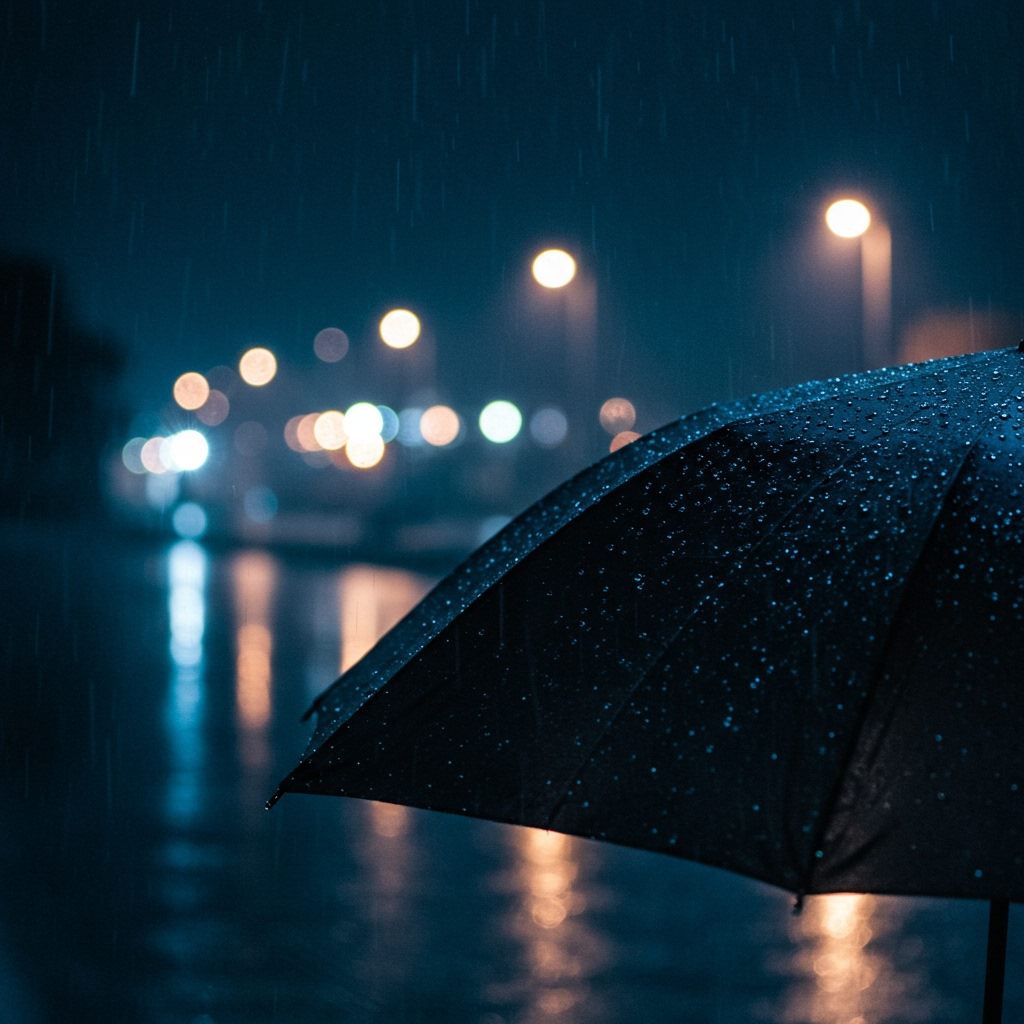

In [ ]:
# Generate Image
img_response = client.models.generate_images(
    model='imagen-3.0-generate-002',
    prompt='An umbrella in the foreground, and a rainy night sky in the background',
    config=types.GenerateImagesConfig(
        negative_prompt='human',
        number_of_images=1,
        include_rai_reason=True,
        output_mime_type='image/jpeg',
    ),
)
img_response.generated_images[0].image.show()

### Image Prompt Enhancement

This example uses Gemini to enhance an image generation prompt, then send that prompt to Imagen 3.

Original Prompt: An umbrella in the foreground, and a rainy night sky in the background
Enhanced Prompt: **A luminous, ethereal umbrella crafted from iridescent dragonfly wings, held aloft by a spectral hand emanating from the swirling, inky depths of a rain-swept, star-shattered night. The rain itself shimmers with captured starlight, each drop a tiny, fleeting galaxy, cascading around the protective field of the umbrella. Below, reflections of neon-drenched cityscapes distort and dance in the puddles, hinting at forgotten memories and untold stories whispering in the downpour. A single, bioluminescent moth spirals towards the umbrella's delicate canopy, drawn to its otherworldly glow amidst the chromatic chaos.**



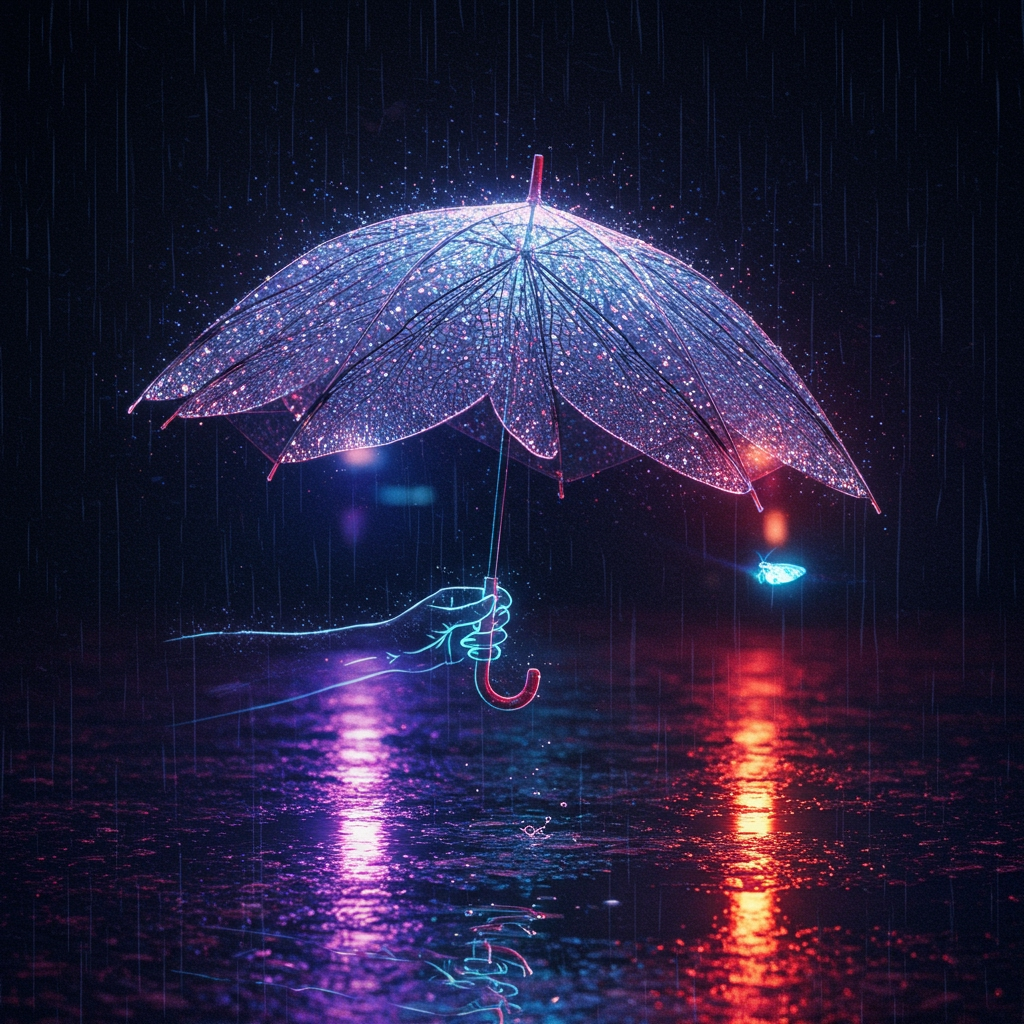

In [ ]:
from google import genai
from google.genai import types
from google.genai.types import ToolConfig, FunctionCallingConfig, GenerateContentConfig, FunctionCallingConfigMode
from IPython.display import Markdown

# Ask Gemini to enhance a prompt
image_prompt = "An umbrella in the foreground, and a rainy night sky in the background"

response = client.models.generate_content(
    model="gemini-2.0-flash-001",
    contents="Enhance this image prompt, be very creative, provide only a single enhanced prompt: " + image_prompt,
)

enhanced_prompt = response.text

# Output the original and enhanced prompts
print(f"Original Prompt: {image_prompt}")
print(f"Enhanced Prompt: {enhanced_prompt}")


# Use the enhanced prompt to generate the image
img_response = client.models.generate_images(
    model='imagen-3.0-generate-002',
    prompt=enhanced_prompt,
    config=types.GenerateImagesConfig(
        negative_prompt='human',
        number_of_images=1,
        include_rai_reason=True,
        output_mime_type='image/jpeg',
    ),
)
img_response.generated_images[0].image.show()

## Multimodal Structured Prompts

For the first time, we are going to use a list to contain the different parts of the prompt. This can be done in a variety of ways,

Provide a single string as shown in the text example above:

```python
contents='Can you recommend some things to do in Boston and New York in the winter?'
```
Provide a single Content instance with multiple Part instances:
```python
contents=types.Content(parts=[
    types.Part.from_text(text='Can you recommend some things to do in Boston in the winter?'),
    types.Part.from_text(text='Can you recommend some things to do in New York in the winter?')
], role='user')
```

When sending more than one input type, provide a list with multiple Content instances:
```python
contents=[
    'What is this a picture of?',
    types.Part.from_uri(
        file_uri='gs://generativeai-downloads/images/scones.jpg',
        mime_type='image/jpeg',
    ),
]
```

Learn more at:
*   **How to structure contents:** https://googleapis.github.io/python-genai/#how-to-structure-contents
*   **genai.types.Part:** https://googleapis.github.io/python-genai/genai.html#genai.types.Part


In [ ]:
# Here, we use Part.from_bytes() to send the image that was generated in the previous cell.
# Note that we need to provide both the image bytes and the mime_type.
prompt = [
        types.Part.from_bytes(
            data=img_response.generated_images[0].image.image_bytes,
            mime_type=img_response.generated_images[0].image.mime_type
            ),
        "Describe the above image"
        ]

# Send the request
response = client.models.generate_content(
    model="gemini-2.0-flash-001",
    contents=prompt
)

Markdown(response.text)

The image is a surreal and visually striking scene of an umbrella in the rain. Here's a breakdown of the key elements:

*   **Umbrella:** The umbrella is the central focus. It's a shimmering, almost translucent material filled with sparkling specks. The frame appears delicate and its edges are subtly outlined with pink hues.
*   **Rain:** Vertical lines represent the heavy rain falling.
*   **Hand:** The umbrella is held by a hand, but the hand is depicted as a neon blue outline rather than a realistic rendering. This adds to the fantastical atmosphere.
*   **Ground/Reflection:** The ground is wet and reflective, mirroring the lights and colors above. The reflections create an effect of depth and further emphasize the watery setting.
*   **Color Palette:** The overall color palette is dark and moody, dominated by blues, purples, and blacks. These cool colors are contrasted by the occasional warmer red and pink tones.
*   **Atmosphere:** The image has a dreamlike or futuristic atmosphere due to the neon elements, the stylized rain, and the shimmering umbrella.
*   **Neon Elements:** The outlines of the hand and the reflections on the ground create a neon effect.
*   **A glowing insect** a the bottom right corner, possibly a firefly, adds to the surrealism.

Overall, the image is a beautiful and captivating blend of realism and fantasy, creating a unique and memorable visual experience.

## Simple Example: Using Python Requests Library

In [ ]:
import requests

html_url="https://arxiv.org/html/1706.03762v7"

# Get the contents of the HTML URL using the Python Requests library
content = requests.get(html_url).content

# Create a multi-part prompt
prompt = [
    content,
    "Summarize the above content"
]

# Generate our response
response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

Markdown(response.text)

This HTML document presents the paper "Attention Is All You Need," introducing the Transformer, a novel neural network architecture for sequence transduction that relies solely on attention mechanisms, eschewing recurrence and convolutions.

**Here's a breakdown of the key elements:**

*   **Introduction:** Explains the limitations of recurrent models (RNNs, LSTMs) due to sequential computation and introduces the Transformer as a more parallelizable alternative.
*   **Background:** Discusses related work and highlights the novelty of the Transformer in using self-attention exclusively.
*   **Model Architecture:** Details the encoder-decoder structure of the Transformer, focusing on:
    *   Encoder and decoder stacks consisting of multiple identical layers with self-attention and feed-forward networks.
    *   Scaled Dot-Product Attention and Multi-Head Attention mechanisms.
    *   Position-wise Feed-Forward Networks.
    *   Embeddings and Softmax for input/output processing.
    *   Positional Encoding to incorporate sequence order.
*   **Why Self-Attention:** Compares self-attention with recurrent and convolutional layers regarding computational complexity, parallelization, and the path length for long-range dependencies.
*   **Training:** Describes the training data, hardware, schedule, optimizer (Adam), and regularization techniques (residual dropout, label smoothing) used.
*   **Results:** Presents the Transformer's performance on machine translation tasks (English-German and English-French), showing it achieves state-of-the-art BLEU scores with significantly less training time. Model variations and results on English constituency parsing are also discussed, showcasing the model's generalizability.
*   **Conclusion:** Summarizes the key contributions and proposes future research directions, including applying attention-based models to other modalities and exploring local attention mechanisms. The code is available on Github.
*   **Appendix:** Includes attention visualizations from the model, showing how different heads learn to attend to different aspects of the sentence, including long-distance dependencies and syntactic structure.

In essence, the document is the HTML version of a research paper proposing a new and more efficient neural network architecture, the Transformer, for sequence transduction tasks. The paper demonstrates the Transformer's superior performance and parallelization capabilities, making it a significant contribution to the field of neural machine translation and beyond.


### Multimodal Prompting: PDF Example
Let's practice sending a PDF and summarizing it.

In [ ]:
pdf_url = "https://arxiv.org/pdf/1706.03762"

# Get the contents of the PDF URL using the Python Requests library
content = requests.get(pdf_url).content

pdf_part = types.Part.from_bytes(
      data=content,
      mime_type="application/pdf" # <=== Set the MIME TYPE to 'application/pdf'
    )
# Create a multi-part prompt
prompt = [
    pdf_part,
    "Summarize the above content"
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt
)

Markdown(response.text)

Hark, lend thine ears! 👂 A new architecture, the Transformer, doth grace the stage! A model of such simple elegance, yet potent in its ways.

**Key Points, Good Sir:**

*   ✨ Dispensing with the recurrences and convolutions of old, it relies solely on the art of *attention*.
*   ⚔️ In machine translation, it vanquishes rivals, achieving better quality with greater swiftness and training at a fraction of the price.
*   🥇 It doth claim the crown 👑 on both English-to-German and English-to-French tasks, surpassing even ensemble models by a mighty margin.
*   💪 Not only doth it translate with grace, but it also proves its mettle in English constituency parsing, showcasing its talent for diverse tasks.
*   The architecture doth embrace self-attention and feed-forward networks, stacked high like castle walls 🏰.
*   The positional encodings guide the model where no recurrent bones exist, the sinusoidal verses are etched in data, where relative position can be learned.

Thus, the Transformer stands tall, a testament to the power of attention in the realm of sequence transduction. Huzzah! 🥳🎉

---
---

## Using Playwright to Screenshot Pages

This example uses [Playwright](https://playwright.dev/) to visit a page and take a full-page screenshot which is then sent to Gemini for summarization.

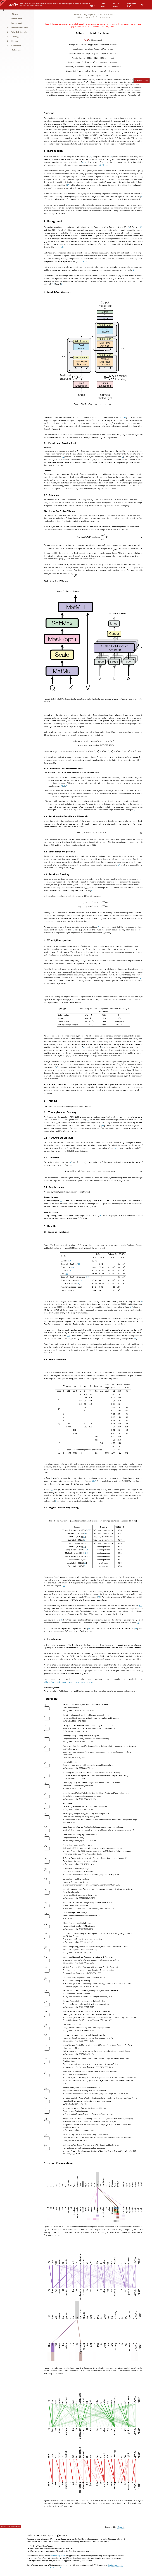

In [ ]:
# Use playwright to visit a URL and take a screenshot of the entire page which is saved to a local file.

from playwright.async_api import async_playwright
from playwright.sync_api import sync_playwright
import playwright
import asyncio
from IPython.display import Image

# Colab runs in an async runloop, so we'll write this as an async function
async def fetch_page_image(url: str = ""):
    async with async_playwright() as p:
        # Generate a filename using the url, but use only the domain and path, delimited by an underscore (_)
        filename = url.replace("https://", "").replace("http://", "").replace("/", "_") + ".png"
        browser = await p.chromium.launch()
        page = await browser.new_page()
        await page.goto(url)
        await page.screenshot(path=f"{filename}", full_page=True)
        # Get the HTML content
        html_content = await page.content()
        await browser.close()
        # Return the image bytes and HTML content
        return filename, open(f"{filename}", "rb").read(), html_content


image_filename, image_bytes, html_content = await fetch_page_image("https://arxiv.org/html/1706.03762v7")

# Display the image in path "example.png" but scaled to 100 pixels wide
Image(filename=image_filename, width=800)

In [ ]:
# Upload the file using the API

from pydantic import BaseModel, Field
from google.cloud import storage
from google import genai
from google.genai import types
import pprint

class ArxivExtractionModel(BaseModel):
  page_summary: str = Field(description="A summary of the provided webpage")
  authors: list[str] = Field(description="The name(s) of the authors.")
  references: list[str] = Field(description="Every reference cited in the paper")

# If using GCP (PROJECT_ID is defined), create a "Part" from the image bytes we already have in memory,
# otherwise (PROJECT_ID is empty), we're using AI Studio, so upload the file using the
if PROJECT_ID != "":

  if BUCKET == "":
    # Create image part from existing bytes stored in memory
    image_part = types.Part.from_bytes(data=image_bytes, mime_type="image/png")
  else:
    # Alternative: Upload the file to GCS and use a Part.from_uri
    storage_client = storage.Client(project=PROJECT_ID)
    bucket = storage_client.bucket(BUCKET)
    blob = bucket.blob(image_filename)
    blob.upload_from_filename(image_filename)

    gcs_uri = f'gs://{bucket.name}/{blob.name}'

    image_part = types.Part.from_uri(
      file_uri=gcs_uri,
      mime_type="image/png"
    )

else:
  file_upload = client.files.upload(path=image_filename)
  image_part=types.Part.from_uri(
                    file_uri=file_upload.uri,
                    mime_type=file_upload.mime_type)

# Use a multi-part structured prompt
prompt = ["# Web Page Image",
          image_part,
          "# Web Page HTML Content",
          html_content,
          "Summarize the web page screenshot and HTML content. Then condense the information contained within. format everyting in Markdown."
          ]

config = types.GenerateContentConfig(
    response_schema=ArxivExtractionModel,
    response_mime_type="application/json",
    system_instruction=None
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=config,
)

# Parse the structured response. This can be done using `response.parsed` (Method 1)
# or through explicit casting/model validation (Method 2)

# Method 1: Use "response.parsed" to get the response cast into ArxivExtractionModel
parsed_response = response.parsed

# Method 2: Use explicit casting (not used, but equivalent to Method 1)
cast_response = ArxivExtractionModel.model_validate_json(response.text)

# Print the results
print(parsed_response.model_dump_json(indent=2))
print("---")
Markdown(parsed_response.page_summary)

{
  "page_summary": "The webpage presents a research paper titled \"Attention Is All You Need,\" which introduces the Transformer, a novel neural network architecture based solely on attention mechanisms. The paper details the model's architecture, advantages over recurrent and convolutional networks, training methodology, and results on machine translation and constituency parsing tasks. The authors demonstrate that the Transformer achieves state-of-the-art performance with significantly less training time and computational cost. The page provides access to the paper's abstract, figures, tables, and a means to report issues with the HTML rendering.",
  "authors": [
    "Ashish Vaswani",
    "Noam Shazeer",
    "Niki Parmar",
    "Jakob Uszkoreit",
    "Llion Jones",
    "Aidan N. Gomez",
    "Łukasz Kaiser",
    "Illia Polosukhin"
  ],
  "references": [
    "Jimmy Lei Ba, Jamie Ryan Kiros, and Geoffrey E Hinton. Layer normalization. arXiv preprint arXiv:1607.06450, 2016.",
    "Dzmitr

The webpage presents a research paper titled "Attention Is All You Need," which introduces the Transformer, a novel neural network architecture based solely on attention mechanisms. The paper details the model's architecture, advantages over recurrent and convolutional networks, training methodology, and results on machine translation and constituency parsing tasks. The authors demonstrate that the Transformer achieves state-of-the-art performance with significantly less training time and computational cost. The page provides access to the paper's abstract, figures, tables, and a means to report issues with the HTML rendering.

# 9.0 - Developing Agents

## CrewAI Agent
This sample CrewAI agent first generates a list of planets, then randomly selects one before sharing 3 facts about the selected planet.

In [ ]:
from typing import Type, List, Optional
from pydantic import BaseModel, Field
from crewai import LLM, Task, Agent, Crew
from crewai.tools import BaseTool
import random
from IPython.display import display, Markdown


class SolarSystem(BaseModel):
    planets: List[str] = Field(..., description="A python list containing planet names")

class PlanetSelectorTool(BaseTool):
  name: str = "random_planet_selector"
  description: str = "Select a random planet from an SolarSystem instance"
  args_schema: Type[BaseModel] = SolarSystem

  def _run(self, planets: List[str] ) -> str:
    planet = random.choice(planets)
    display(Markdown(f"Selected planet: {planet}"))
    return planet

tool_planet_selector = PlanetSelectorTool()

llm = LLM(
    model="vertex_ai/gemini-2.0-flash-001",
)

# Create an agent using the custom LLM
agent = Agent(
    role="AI Assistant",
    goal="Provide helpful responses",
    backstory="I am an AI assistant created to help users.",
    llm=llm,
    verbose=True
)

task_planet_list=Task(
    description="List all planets in the solar system",
    expected_output="A list of planets",
    output_pydantic=SolarSystem,
    agent=agent
)

task_planet_selector=Task(
    description="Select a random planet from this list:",
    expected_output="The name of the selected planet",
    agent=agent,
    tools=[tool_planet_selector],
    context=[task_planet_list]
)

# Create tasks for the agent
task_facts = Task(
    description="Provide 3 facts about the following planet",
    expected_output="Respond to user queries",
    agent=agent,
    context=[task_planet_selector]
)

# Create the crew with the agent and task
crew = Crew(
    agents=[agent],
    tasks=[task_planet_list, task_planet_selector, task_facts],
)

response = crew.kickoff()

Markdown(response.raw)

# Agent: AI Assistant
## Task: List all planets in the solar system


# Agent: AI Assistant
## Final Answer: 
```json
{
  "planets": [
    "Mercury",
    "Venus",
    "Earth",
    "Mars",
    "Jupiter",
    "Saturn",
    "Uranus",
    "Neptune"
  ]
}
```


# Agent: AI Assistant
## Task: Select a random planet from this list:


Selected planet: Neptune



# Agent: AI Assistant
## Using tool: random_planet_selector
## Tool Input: 
"{\"planets\": [\"Mercury\", \"Venus\", \"Earth\", \"Mars\", \"Jupiter\", \"Saturn\", \"Uranus\", \"Neptune\"]}"
## Tool Output: 
Neptune


# Agent: AI Assistant
## Final Answer: 
Neptune


# Agent: AI Assistant
## Task: Provide 3 facts about the following planet


# Agent: AI Assistant
## Final Answer: 
Neptune is a fascinating planet, here are 3 facts about it:

1.  **Neptune is the Windiest Planet:** Neptune's atmosphere experiences the fastest winds in the solar system, reaching speeds of over 1,200 mph (2,000 km/h). These winds are thought to be fueled by the planet's internal heat.

2.  **Neptune is Tilted:** Neptune has an axial tilt of 28 degrees, very similar to Earth's 23.5-degree tilt. This means that Neptune experiences seasons much like Earth does.

3.  **Neptune was the First Planet Discovered by Mathematical Prediction:** Unlike other planets which were observed directly, Neptune's existence wa

Neptune is a fascinating planet, here are 3 facts about it:

1.  **Neptune is the Windiest Planet:** Neptune's atmosphere experiences the fastest winds in the solar system, reaching speeds of over 1,200 mph (2,000 km/h). These winds are thought to be fueled by the planet's internal heat.

2.  **Neptune is Tilted:** Neptune has an axial tilt of 28 degrees, very similar to Earth's 23.5-degree tilt. This means that Neptune experiences seasons much like Earth does.

3.  **Neptune was the First Planet Discovered by Mathematical Prediction:** Unlike other planets which were observed directly, Neptune's existence was predicted using mathematics before it was ever seen through a telescope. Astronomers noticed irregularities in Uranus's orbit and hypothesized that another planet's gravity was affecting it. Using these calculations, Johann Galle found Neptune in 1846.

# 10.0 - Scaling and Reliability

## Provisioned Throughput

If you have purchaed provisioned throughput, you may sometimes wish to direct requests based on priority. For example, high-priority requests might be directed to the Provisioned Throughput pool you have purchased, while low priority requests may go to the shared capacity pool.

The following code sample demonstrates how to use the `X-Vertex-AI-LLM-Request-Type` HTTP header to control how the request will be handled.

In [ ]:
from google import genai from google.genai.types import HttpOptions

client = genai.Client(
    http_options=HttpOptions(
      api_version="v1",
      headers={
          "X-Vertex-AI-LLM-Request-Type": "shared" # Options: "dedicated", "shared"
          },
    )
)

response = client.models.generate_content( model="gemini-2.0-flash-001", contents="How does AI work?", )

Markdown(response.text)


# 11.0 - Resources

## Gemini Code Samples
- Gemini Cookbook: https://github.com/google-gemini/cookbook
- Google Cloud Generative AI: https://github.com/GoogleCloudPlatform/generative-ai
- Google Cloud Applied AI Engineering: https://github.com/GoogleCloudPlatform/applied-ai-engineering-samples

---
---
## Andrej Karpathy's YouTube Video Series
Andrej Karpathy is a computer scientist specializing in AI, deep learning, and neural networks. Born in 1986, he holds a Ph.D. from Stanford, where he also created the CS 231n deep learning course. Karpathy was a founding member of OpenAI and served as Director of AI at Tesla, leading the Autopilot computer vision team. In 2024, he founded Eureka Labs, an AI education company.

### Video 1: [Dive Deep Into LLMs](https://youtu.be/7xTGNNLPyMI)
**URL:** https://youtu.be/7xTGNNLPyMI

This thorough deep dive explains LLMs starting with pre-training, fine-tuning, and ending reinforcement learning while keeping the math to an absolute minimum. The insights presented in this video will help you optimize and maximize the value of your LLM projects.

### Video 2: [Neural Networks: Zero to Hero](https://www.youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ)
**URL:** https://www.youtube.com/playlist?list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ

This playlist covers many topics in machine learning and LLMs,including a 2-hour video titled "[Let's build GPT: from scratch, in code, spelled out.](https://youtu.be/kCc8FmEb1nY)" which walks developers through the process of building a basic GPT-style model.





## Google Cloud Skills Boost
**Note:** Sessions marked with an asterisk (*) make use of an older Vertex AI / Gemini Software Development Kit (SDK). Although different from the newer Gemini 2.0 SDk, this older SDK will continue to function and be supported. The concepts taught in these older labs are still applicable to Gemini 2.0.

* [Intro to Gemini 2.0 Flash](https://www.cloudskillsboost.google/focuses/115001)
* [Getting Started with the Gemini 2.0 Flash Thinking Model](https://www.cloudskillsboost.google/focuses/115003)
* [Intro to Generating and Executing Python Code with Gemini 2.0](https://www.cloudskillsboost.google/focuses/115247)
* [Introduction to Function Calling with Gemini](https://www.cloudskillsboost.google/focuses/85993)*
* [Document Processing with Gemini](https://www.cloudskillsboost.google/focuses/109484)*
* [Multimodality with Gemini](https://www.cloudskillsboost.google/focuses/83266)*
* [Develop GenAI Apps with Gemini and Streamlit](https://www.cloudskillsboost.google/course_templates/978)*
* [Develop an app with Gemini](https://www.cloudskillsboost.google/focuses/90769)*


### Cloud Skills Boost Challenge Labs
In a challenge lab you’re given a scenario and a set of tasks. Instead of following step-by-step instructions, you will use the skills learned from the labs in the course to figure out how to complete the tasks on your own!

When you take a challenge lab, you will not be taught new Google Cloud concepts. You are expected to extend your learned skills, like changing default values and reading and researching error messages to fix your own mistakes.

* [Explore Generative AI with the Gemini API in Vertex AI: Challenge Lab](https://www.cloudskillsboost.google/focuses/85653)
* [Prompt Design in Vertex AI: Challenge Lab](https://www.cloudskillsboost.google/focuses/86473)